In [1]:
from pathlib import Path

parameters = {
  'prom_directory': Path('C:/Users/domin/Documents/prom'), # Directory to the ProM installation.
  'lib_directory':  Path('lib'),   # Lib directory, to be contained in the promDirectory, specified above.
  'dist_directory': Path('dist'), # Dist directory, to be contained in the promDirectory, specified above.
  'memory': '4G', # Memory for Java to use.
  'java': 'jre8\\bin\\java'  # Java command: 'java' for Linux, 'jre8\\bin\\java' for Windows.
}

In [2]:
from prompy import DocumentationGenerator
DocumentationGenerator.generate_documentation('Documentation.py', parameters)

jre8\bin\java -da -classpath ".\dist\ProM-Contexts.jar;.\dist\ProM-Framework.jar;.\dist\ProM-Models.jar;.\dist\ProM-Plugins.jar;.\lib\bsh-2.0b4.jar;.\lib\commons-compress-1.13.jar;.\lib\commons-logging-1.1.3.jar;.\lib\google-analytics-java-1.1.2.jar;.\lib\guava-16.0.1.jar;.\lib\httpclient-4.5.3.jar;.\lib\httpcore-4.4.6.jar;.\lib\jargs-latest.jar;.\lib\jgraph-5.13.0.4.jar;.\lib\junit-4.12.jar;.\lib\log4j-api-2.8.1.jar;.\lib\log4j-core-2.8.1.jar;.\lib\log4j-slf4j-impl-2.8.1.jar;.\lib\lpsolve55j.jar;.\lib\Murata.jar;.\lib\PNAnalysis.jar;.\lib\PNetAlignmentAnalysis.jar;.\lib\PNetReplayer.jar;.\lib\slf4j-api-1.7.25.jar;.\lib\slickerbox-1.0rc1.jar;.\lib\Spex-1.1.jar;.\lib\TableLayout-20050920.jar;.\lib\Uitopia-0.6-20190913.jar;.\lib\UITopiaResources-0.6-20190913.jar;.\lib\Woflan.jar" -Djava.library.path=./lib -Djava.util.Arrays.useLegacyMergeSort=true -Xmx4G org.processmining.contexts.cli.CLI -l
Timeout reached.
No plug-in has started yet. Increase the timeout if a plug-in is used in the scr

In [3]:
from Documentation import *

In [4]:
import os
def show_image(filename, delete=False):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(filename)
    plt.figure(figsize=(15,10))
    plt.imshow(image)
    plt.show()
    if delete:
        os.remove(filename)

In [5]:
from prompy import ProMExecutor, ScriptBuilder

prom_executor = ProMExecutor.ProMExecutor(parameters)

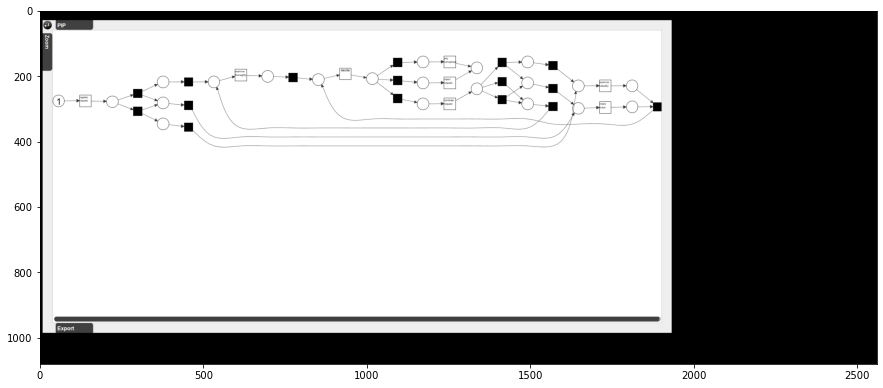

In [6]:
# Import a petrinet and visualize it
import os

script = ScriptBuilder.get_petrinet('C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml')
script += 'jcomp = _0_visualize_petri_net(petrinet);'
script += ScriptBuilder.visualize('jcomp', 2560, 1080)
script += ScriptBuilder.end()

output = prom_executor.run_script(script, timeout=30, verbosity=0)
show_image('temp.png', delete=True)

In [7]:
# Export a petrinet
script = ScriptBuilder.get_petrinet('C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml')
script += ScriptBuilder.export_petrinet('petrinet', 'C:/Users/domin/Documents/prompy/examples/petrinet_exported.pnml')
script += ScriptBuilder.end()

print(ScriptBuilder.show_script(script))

print(prom_executor.run_script(script, timeout=30, verbosity=0))

  1: _petrinetImportResult = import_petri_net_from_pnml_file("C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml");
  2: 
  3: petrinet = _petrinetImportResult[0];
  4: 
  5: marking = _petrinetImportResult[1];
  6: pnml_export_petri_net_(petrinet, new File("C:/Users/domin/Documents/prompy/examples/petrinet_exported.pnml"));
  7: print("Done, exiting.");
  8: exit();
  9: 
[SCRIPT_OUTPUT] Done, exiting.


In [8]:
# Check a petrinet for soundness
script = ScriptBuilder.get_petrinet('C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml')
script += ScriptBuilder.get_soundness('petrinet')
script += '\nprint("Soundness: " + soundness);'
script += ScriptBuilder.end()

# script = '_petrinetImportResult = import_petri_net_from_pnml_file("C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml");petrinet = _petrinetImportResult[0];marking = _petrinetImportResult[1];woflanResult = analyze_with_woflan(petrinet);soundness = woflanResult.isSound();print("Soundness: " + soundness);print("Done, exiting.");exit();'

print(ScriptBuilder.show_script(script))

print(prom_executor.run_script(script, timeout=30, verbosity=0))

  1: _petrinetImportResult = import_petri_net_from_pnml_file("C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml");
  2: 
  3: petrinet = _petrinetImportResult[0];
  4: 
  5: marking = _petrinetImportResult[1];
  6: reducedModel = reduce_all_transitions_retain_sink_source_places(petrinet);
  7: 
  8: woflanResult = analyze_with_woflan(reducedModel);
  9: 
 10: soundness = woflanResult.isSound();
 11: 
 12: print("Soundness: " + soundness);
 13: print("Done, exiting.");
 14: exit();
 15: 
[SCRIPT_OUTPUT] Soundness: false
[SCRIPT_OUTPUT] Done, exiting.


In [9]:
# Conformance checking 1 model, 1 log
script = ScriptBuilder.get_log('C:/Users/domin/Documents/prompy/examples/log_1.xes')
script += ScriptBuilder.get_petrinet('C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml')
script += ScriptBuilder.get_mapping('petrinet', 'log')
script += ScriptBuilder.get_fitness('petrinet', 'log', 'mapping', variable_prefix='fitness_')
script += 'print(fitness_result.getInfo());\n'
script += ScriptBuilder.get_precision('petrinet', 'marking', 'mapping', alignment_result_variable_name='fitness_result', variable_prefix='precision_')
script += '\nprint("Precision: " + precision_result.getPrecision());'
script += '\nprint("Generalization: " + precision_result.getGeneralization());'
script += ScriptBuilder.end()

# print(ScriptBuilder.show_script(script))

output = prom_executor.run_script(script, timeout=20, verbosity=1)
print(output)


Start plug-in Open XES Log File
End plug-in Open XES Log File, took 102 milliseconds
[AbstractPluginDescriptor] Using GoogleAnalytics
Start plug-in Import Petri net from PNML file
End plug-in Import Petri net from PNML file, took 171 milliseconds
[AbstractPluginDescriptor] Using GoogleAnalytics
Start plug-in Replay a Log on Petri Net for Conformance Analysis
End plug-in Replay a Log on Petri Net for Conformance Analysis, took 135 milliseconds
[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=0.0, Raw Fitness Cost=17.42500000000001, Max Move-Log Cost=17.42500000000001, Num. States=1.0, Trace Fitness=0.0, Move-Model Fitness=1.0, Move-Log Fitness=0.0, Max Fitness Cost=17.42500000000001, Trace Length=3.484999999999999, Queued States=1.0}
[SCRIPT_OUTPUT] Precision: 0.0
[SCRIPT_OUTPUT] Generalization: 0.0
[SCRIPT_OUTPUT] Done, exiting.



In [10]:
# Conformance checking 1 model, 1 log version 2
script = ScriptBuilder.get_log('C:/Users/domin/Documents/prompy/examples/log_1.xes')
script += ScriptBuilder.get_petrinet('C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml')
script += ScriptBuilder.get_conformance('petrinet', 'marking', 'log')
script += 'print(_fitness_result.getInfo());\n'
script += '\nprint("Precision: " + _precision_result.getPrecision());'
script += '\nprint("Generalization: " + _precision_result.getGeneralization());'
script += ScriptBuilder.end()

print(prom_executor.run_script(script, timeout=20, verbosity=0))

[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=0.0, Raw Fitness Cost=17.42500000000001, Max Move-Log Cost=17.42500000000001, Num. States=1.0, Trace Fitness=0.0, Move-Model Fitness=1.0, Move-Log Fitness=0.0, Max Fitness Cost=17.42500000000001, Trace Length=3.484999999999999, Queued States=1.0}
[SCRIPT_OUTPUT] Precision: 0.0
[SCRIPT_OUTPUT] Generalization: 0.0
[SCRIPT_OUTPUT] Done, exiting.


In [11]:
# Conformance checking batch (1 model, x logs)
directory = 'C:/Users/domin/Documents/prompy/examples/'
logs = [f'{directory}{l}' for l in ['log_1.xes', 'log_2.xes']]

script = ScriptBuilder.to_java_array(logs, 'array')

script += 'for (logFilename : array) {'
script += 'print(logFilename);'
script += ScriptBuilder.get_log('logFilename', from_variable=True)
script += ScriptBuilder.get_petrinet('C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml')
script += ScriptBuilder.get_mapping('petrinet', 'log')
script += ScriptBuilder.get_fitness('petrinet', 'log', 'mapping', variable_prefix='fitness_')
script += 'print(fitness_result.getInfo());\n'
script += '}' # Close for loop
script += ScriptBuilder.end()

print(prom_executor.run_script(script, timeout=20, verbosity=1))


Start plug-in Open XES Log File
End plug-in Open XES Log File, took 106 milliseconds
[AbstractPluginDescriptor] Using GoogleAnalytics
Start plug-in Import Petri net from PNML file
End plug-in Import Petri net from PNML file, took 152 milliseconds
[AbstractPluginDescriptor] Using GoogleAnalytics
Start plug-in Replay a Log on Petri Net for Conformance Analysis
End plug-in Replay a Log on Petri Net for Conformance Analysis, took 133 milliseconds
[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=1.0, Raw Fitness Cost=17.42500000000001, Max Move-Log Cost=17.42500000000001, Num. States=1.0, Trace Fitness=0.0, Move-Model Fitness=1.0, Move-Log Fitness=0.0, Max Fitness Cost=17.42500000000001, Trace Length=3.484999999999999, Queued States=1.0}
[SCRIPT_OUTPUT] C:/Users/domin/Documents/prompy/examples/log_2.xes
[AbstractPluginDescriptor] Using GoogleAnalytics
Start plug-in Open XES Log File
End plug-in Open XES Log File, took 14 milliseconds
[AbstractPluginDescriptor] Using GoogleAnalyti

In [12]:
# Conformance checking batch (x models, 1 log)
directory = 'C:/Users/domin/Documents/prompy/examples/'
logs = [f'{directory}{l}' for l in ['petrinet_1.pnml', 'petrinet_2.pnml']]

script = ScriptBuilder.to_java_array(logs, 'array')

script += 'for (petrinetFilename : array) {'
script += 'print(petrinetFilename);'
script += ScriptBuilder.get_log('C:/Users/domin/Documents/prompy/examples/log_1.xes')
script += ScriptBuilder.get_petrinet('petrinetFilename', from_variable=True)
script += ScriptBuilder.get_mapping('petrinet', 'log')
script += ScriptBuilder.get_fitness('petrinet', 'log', 'mapping', variable_prefix='fitness_')
script += 'print(fitness_result.getInfo());\n'
script += '}' # Close for loop
script += ScriptBuilder.end()

print(prom_executor.run_script(script, timeout=20, verbosity=0))

[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=0.0, Raw Fitness Cost=17.42500000000001, Max Move-Log Cost=17.42500000000001, Num. States=1.0, Trace Fitness=0.0, Move-Model Fitness=1.0, Move-Log Fitness=0.0, Max Fitness Cost=17.42500000000001, Trace Length=3.484999999999999, Queued States=1.0}
[SCRIPT_OUTPUT] C:/Users/domin/Documents/prompy/examples/petrinet_2.pnml
[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=0.0, Raw Fitness Cost=17.42500000000001, Max Move-Log Cost=17.42500000000001, Num. States=1.0, Trace Fitness=0.0, Move-Model Fitness=1.0, Move-Log Fitness=0.0, Max Fitness Cost=17.42500000000001, Trace Length=3.484999999999999, Queued States=1.0}
[SCRIPT_OUTPUT] Done, exiting.


In [13]:
# Conformance checking batch (x models, x logs)
petrinetDirectory = 'C:/Users/domin/Documents/prompy/examples/'
petrinets = [f'{petrinetDirectory}{l}' for l in ['petrinet_1.pnml', 'petrinet_2.pnml']]
logDirectory = 'C:/Users/domin/Documents/prompy/examples/'
logs = [f'{logDirectory}{l}' for l in ['log_1.xes', 'log_2.xes']]

script = ScriptBuilder.to_java_array(logs, 'logArray')
script += ScriptBuilder.to_java_array(petrinets, 'petrinetArray')

script += 'for (petrinetFilename : petrinetArray) {'
script += 'for (logFilename : logArray) {'
script += 'print(petrinetFilename + ", " + logFilename);'
script += ScriptBuilder.get_log('logFilename', from_variable=True)
script += ScriptBuilder.get_petrinet('petrinetFilename', from_variable=True)
script += ScriptBuilder.get_mapping('petrinet', 'log')
script += ScriptBuilder.get_fitness('petrinet', 'log', 'mapping', variable_prefix='fitness_')
script += 'print(fitness_result.getInfo());\n'
script += '}}' # Close for loops
script += ScriptBuilder.end()

print(prom_executor.run_script(script, timeout=20, verbosity=0))

[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=0.0, Raw Fitness Cost=17.42500000000001, Max Move-Log Cost=17.42500000000001, Num. States=1.0, Trace Fitness=0.0, Move-Model Fitness=1.0, Move-Log Fitness=0.0, Max Fitness Cost=17.42500000000001, Trace Length=3.484999999999999, Queued States=1.0}
[SCRIPT_OUTPUT] C:/Users/domin/Documents/prompy/examples/petrinet_1.pnml, C:/Users/domin/Documents/prompy/examples/log_2.xes
[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=0.0, Raw Fitness Cost=12.725, Max Move-Log Cost=12.725, Num. States=1.0, Trace Fitness=0.0, Move-Model Fitness=1.0, Move-Log Fitness=0.0, Max Fitness Cost=12.725, Trace Length=2.545, Queued States=1.0}
[SCRIPT_OUTPUT] C:/Users/domin/Documents/prompy/examples/petrinet_2.pnml, C:/Users/domin/Documents/prompy/examples/log_1.xes
[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=0.0, Raw Fitness Cost=17.42500000000001, Max Move-Log Cost=17.42500000000001, Num. States=1.0, Trace Fitness=0.0, Move-Model

[SCRIPT_OUTPUT] Mining model
[SCRIPT_OUTPUT] true
[SCRIPT_OUTPUT] Done, exiting.


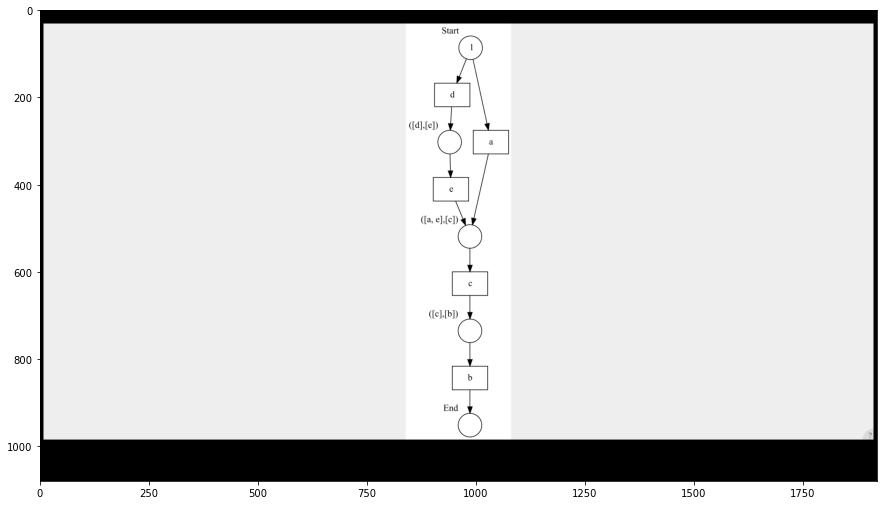

In [14]:
# Alpha miner example
import os

script = ScriptBuilder.mine('C:/Users/domin/Documents/prompy/examples/log_1.xes',
                            'alpha', {'alphaVersion': 'ROBUST'})
script += ScriptBuilder.get_soundness('petrinet')
script += '\nprint(soundness);'
script += 'jcomp = visualize_petri_net_dot_local_(petrinet);'
script += ScriptBuilder.visualize('jcomp', 1920, 1080)
script += ScriptBuilder.end()

print(prom_executor.run_script(script, timeout=25, verbosity=0))
show_image('temp.png', delete=True)

[SCRIPT_OUTPUT] Done, exiting.


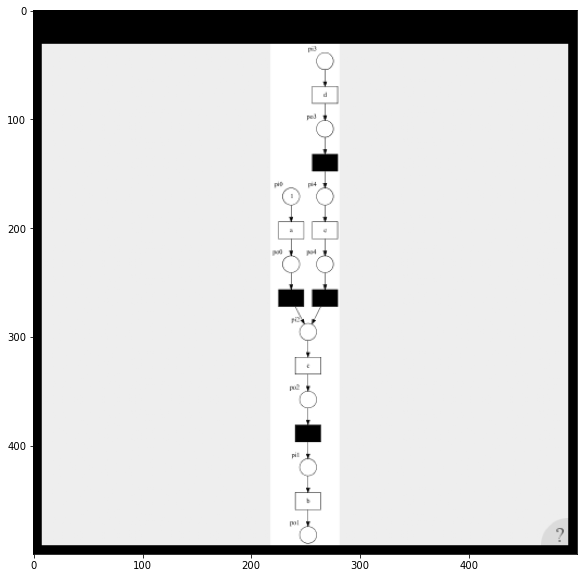

In [15]:
# Heuristics miner example
import os

script = ScriptBuilder.mine('C:/Users/domin/Documents/prompy/examples/log_1.xes',
                            'heuristics', {})
script += 'jcomp = visualize_petri_net_dot_local_(petrinet);'
script += ScriptBuilder.visualize('jcomp', 500, 500, filename='C:/Users/domin/Documents/prompy/examples/output_image.png')
script += ScriptBuilder.end()

print(prom_executor.run_script(script, timeout=20, verbosity=0))
show_image('output_image.png')

In [19]:
# Inductive miner example
import os

script = ScriptBuilder.mine('C:/Users/domin/Documents/prompy/examples/log_1.xes',
                            'inductive', {'parameters': 'imf'})
script += ScriptBuilder.get_soundness('petrinet')
script += 'print("Soundness: " + soundness);'
script += ScriptBuilder.get_conformance('petrinet', 'marking', 'log')
script += 'print(_fitness_result.getInfo());'
script += 'print("Precision: " + _precision_result.getPrecision());'
script += 'print("Generalization: " + _precision_result.getGeneralization());'
script += ScriptBuilder.end()

output = prom_executor.run_script(script, timeout=25, verbosity=0)
print(output)

[SCRIPT_OUTPUT] Soundness: true
[SCRIPT_OUTPUT] {Traversed Arcs=0.0, Calculation Time (ms)=0.0, Raw Fitness Cost=17.42500000000001, Max Move-Log Cost=17.42500000000001, Num. States=1.0, Trace Fitness=0.0, Move-Model Fitness=1.0, Move-Log Fitness=0.0, Max Fitness Cost=17.42500000000001, Trace Length=3.484999999999999, Queued States=1.0}
[SCRIPT_OUTPUT] Precision: 0.0
[SCRIPT_OUTPUT] Generalization: 0.0
[SCRIPT_OUTPUT] Done, exiting.


[SCRIPT_OUTPUT] Done, exiting.


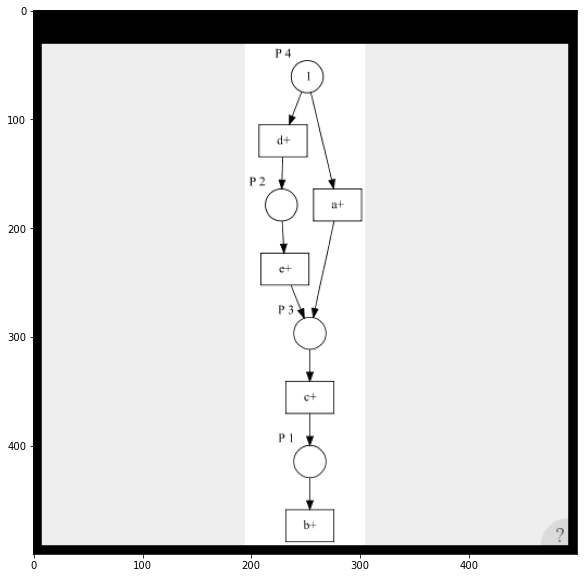

In [18]:
# ILP miner example
import os

script = ScriptBuilder.mine('C:/Users/domin/Documents/prompy/examples/log_1.xes',
                            'ILP', {})
script += 'jcomp = visualize_petri_net_dot_local_(petrinet);'
script += ScriptBuilder.visualize('jcomp', 500, 500)
script += ScriptBuilder.end()

print(prom_executor.run_script(script, timeout=30, verbosity=0))
show_image('temp.png', delete=True)

In [20]:
# Simple parameter grid search
log_filename = 'C:/Users/domin/Documents/prompy/examples/log_1.xes'

versions = ['CLASSIC', 'ROBUST', 'PLUS', 'PLUS_PLUS']

best_version = versions[0]
best_conformance = {'fitness': 0, 'precision': 0, 'generalization': 0}
for version in versions:
    print(f'Trying version {version}')
    script = ScriptBuilder.mine(log_filename, 'alpha', {'alphaVersion': version})
    script += ScriptBuilder.get_conformance('petrinet', 'marking', 'log')
    script += 'print("Move-Model Fitness: " + _fitness_result.getInfo().get("Move-Model Fitness"));'
    script += 'print("Precision: "          + _precision_result.getPrecision());'
    script += 'print("Generalization: "     + _precision_result.getGeneralization());'
    script += ScriptBuilder.end()
    output = prom_executor.run_script(script, timeout=20, verbosity=0)
    try:
        fitness        = float([line for line in output.split('\n') if 'fitness'        in line.lower()][0].split(' ')[-1])
        precision      = float([line for line in output.split('\n') if 'precision'      in line.lower()][0].split(' ')[-1])
        generalization = float([line for line in output.split('\n') if 'generalization' in line.lower()][0].split(' ')[-1])
    except IndexError:
        print('Timeout error occurred, either the miner raised an exception or the conformance checking.')
        fitness, precision, generalization = 0, 0, 0
    if fitness > best_conformance['fitness']:
        best_conformance = {'fitness': fitness, 'precision': precision, 'generalization': generalization}
        best_version = version
print(f'Best alpha version: {best_version} with a fitness, precision and generalization of ({fitness:.2f}, {precision:.2f}, {generalization:.2f})')

Trying version CLASSIC
Trying version ROBUST
Trying version PLUS
Trying version PLUS_PLUS
Best alpha version: CLASSIC with a fitness, precision and generalization of (1.00, 0.00, 0.00)


In [21]:
import itertools

def get_all_possible_parameters(parameter_grid):
    settings_combinations = list(itertools.product(*list(parameter_grid.values())))
    return [dict(zip(parameter_grid.keys(), settings_combination)) for settings_combination in settings_combinations]

In [22]:
# Simple parameter grid search
log_filename = 'C:/Users/domin/Documents/prompy/examples/log_1.xes'

parameter_grids = [
    {'algorithm': ['alpha'],
     'version': ['CLASSIC', 'ROBUST', 'PLUS', 'PLUS_PLUS', 'SHARP', 'DOLLAR']
    },
    {'algorithm': ['alpha'],
     'version':                 ['ROBUST'],
     'causalThreshold':         [0.5, 0.7],
     'noiseThresholdLeastFreq': [0.5, 0.7]
    },
    {'algorithm': ['ILP']
    },
    {'algorithm': ['heuristics'],
     'RELATIVE_TO_BEST_THRESHOLD': [0.05, 0.1, 0.2],
     'L1L_THRESHOLD':              [0.8, 0.9],
     'L2L_THRESHOLD':              [0.9, 0.95],
     'LONG_DISTANCE_THRESHOLD':    [0.8, 0.95]
    },
    {'algorithm': ['inductive'],
     'parameters': ['imf', 'eks', 'im', 'ima', 'imc', 'imcpt']
    },
    {'algorithm': ['inductive'],
     'parameters': ['imf'],
     'noiseThreshold': [0.1, 0.2, 0.3]
    }
]

best_parameters = None
best_conformance = {'fitness': 0, 'precision': 0, 'generalization': 0}
for parameter_grid in parameter_grids:
    for algorithm in parameter_grid['algorithm']:
        candidate_parameters = get_all_possible_parameters(parameter_grid)
        for parameters in candidate_parameters:
            print(parameters)
            script = ScriptBuilder.mine(log_filename, algorithm, parameters)
            script += ScriptBuilder.get_conformance('petrinet', 'marking', 'log')
            script += 'print("Move-Model Fitness: " + _fitness_result.getInfo().get("Move-Model Fitness"));'
            script += 'print("Precision: "          + _precision_result.getPrecision());'
            script += 'print("Generalization: "     + _precision_result.getGeneralization());'
            script += ScriptBuilder.end()
            output = prom_executor.run_script(script, timeout=25, verbosity=0)
            print(output)
            try:
                fitness        = float([line for line in output.split('\n') if 'fitness'        in line.lower()][0].split(' ')[-1])
                precision      = float([line for line in output.split('\n') if 'precision'      in line.lower()][0].split(' ')[-1])
                generalization = float([line for line in output.split('\n') if 'generalization' in line.lower()][0].split(' ')[-1])
            except IndexError:
                print('Timeout error occurred, either the miner raised an exception or the conformance checking.')
                fitness = 0
            if fitness > best_conformance['fitness']:
                best_conformance = {'fitness': fitness, 'precision': precision, 'generalization': generalization}
                best_parameters = parameters
print(f'Best mining parameters: {best_parameters}')
print(f'Conformance: {best_conformance}')


{'algorithm': 'alpha', 'version': 'CLASSIC'}
[SCRIPT_OUTPUT] Mining model
[SCRIPT_OUTPUT] Move-Model Fitness: 1.0
[SCRIPT_OUTPUT] Precision: 0.0
[SCRIPT_OUTPUT] Generalization: 0.0
[SCRIPT_OUTPUT] Done, exiting.
{'algorithm': 'alpha', 'version': 'ROBUST'}
[SCRIPT_OUTPUT] Mining model
[SCRIPT_OUTPUT] Move-Model Fitness: 1.0
[SCRIPT_OUTPUT] Precision: 0.0
[SCRIPT_OUTPUT] Generalization: 0.0
[SCRIPT_OUTPUT] Done, exiting.
{'algorithm': 'alpha', 'version': 'PLUS'}
[SCRIPT_OUTPUT] Mining model
[SCRIPT_OUTPUT] Move-Model Fitness: 1.0
[SCRIPT_OUTPUT] Precision: 0.0
[SCRIPT_OUTPUT] Generalization: 0.0
[SCRIPT_OUTPUT] Done, exiting.
{'algorithm': 'alpha', 'version': 'PLUS_PLUS'}
[SCRIPT_OUTPUT] Mining model
[SCRIPT_OUTPUT] Move-Model Fitness: 1.0
[SCRIPT_OUTPUT] Precision: 0.0
[SCRIPT_OUTPUT] Generalization: 0.0
[SCRIPT_OUTPUT] Done, exiting.
{'algorithm': 'alpha', 'version': 'SHARP'}
[SCRIPT_OUTPUT] Mining model
[SCRIPT_OUTPUT] Move-Model Fitness: 1.0
[SCRIPT_OUTPUT] Precision: 0.0
[SCRIPT_OUT